In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("legal_text_classification.csv")
data

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...
...,...,...,...,...
24980,Case25203,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,That is not confined to persons who control th...
24981,Case25204,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,Once the threshold prescribed by s 1335 is sat...
24982,Case25205,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,Once the threshold prescribed by s 1335 is sat...
24983,Case25206,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",Given the extent to which Deumer stands to gai...


In [3]:
data = data[['case_outcome', 'case_text']]
data

,case_outcome,case_text
0,cited,Ordinarily that discretion will be exercised s...
1,cited,The general principles governing the exercise ...
2,cited,Ordinarily that discretion will be exercised s...
3,cited,The general principles governing the exercise ...
4,cited,The preceding general principles inform the ex...
...,...,...
24980,cited,That is not confined to persons who control th...
24981,cited,Once the threshold prescribed by s 1335 is sat...
24982,cited,Once the threshold prescribed by s 1335 is sat...
24983,distinguished,Given the extent to which Deumer stands to gai...


In [4]:
data['case_outcome'].value_counts()


cited            12219
referred to       4384
applied           2448
followed          2256
considered        1712
discussed         1024
distinguished      608
related            113
affirmed           113
approved           108
Name: case_outcome, dtype: int64

In [5]:
def clear_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'[^ a-z]', '', text)
    while text.find('  ') != -1:
        text = text.replace('  ', ' ')
    return text
data['clean_text']= data['case_text'].apply(lambda x:clear_text(x))
data.head()

/tmp/ipykernel_94778/903900082.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text']= data['case_text'].apply(lambda x:clear_text(x))


,case_outcome,case_text,clean_text
0,cited,Ordinarily that discretion will be exercised s...,ordinarily that discretion will be exercised s...
1,cited,The general principles governing the exercise ...,the general principles governing the exercise ...
2,cited,Ordinarily that discretion will be exercised s...,ordinarily that discretion will be exercised s...
3,cited,The general principles governing the exercise ...,the general principles governing the exercise ...
4,cited,The preceding general principles inform the ex...,the preceding general principles inform the ex...


In [6]:
data['tokenied'] = data['clean_text'].apply(lambda x: word_tokenize(x))
data.head()

,case_outcome,case_text,clean_text,tokenied
0,cited,Ordinarily that discretion will be exercised s...,ordinarily that discretion will be exercised s...,"[ordinarily, that, discretion, will, be, exerc..."
1,cited,The general principles governing the exercise ...,the general principles governing the exercise ...,"[the, general, principles, governing, the, exe..."
2,cited,Ordinarily that discretion will be exercised s...,ordinarily that discretion will be exercised s...,"[ordinarily, that, discretion, will, be, exerc..."
3,cited,The general principles governing the exercise ...,the general principles governing the exercise ...,"[the, general, principles, governing, the, exe..."
4,cited,The preceding general principles inform the ex...,the preceding general principles inform the ex...,"[the, preceding, general, principles, inform, ..."


In [7]:
stop_words = stopwords.words('english')

def remove_stop_words(text):
    type(text)
    filtered_text = []
    for w in text:
        if w not in stop_words:
            filtered_text.append(w)
    return filtered_text

data['no_stopwords'] = data['tokenied'].apply(lambda x:remove_stop_words(x))
data.head()

,case_outcome,case_text,clean_text,tokenied,no_stopwords
0,cited,Ordinarily that discretion will be exercised s...,ordinarily that discretion will be exercised s...,"[ordinarily, that, discretion, will, be, exerc...","[ordinarily, discretion, exercised, costs, fol..."
1,cited,The general principles governing the exercise ...,the general principles governing the exercise ...,"[the, general, principles, governing, the, exe...","[general, principles, governing, exercise, dis..."
2,cited,Ordinarily that discretion will be exercised s...,ordinarily that discretion will be exercised s...,"[ordinarily, that, discretion, will, be, exerc...","[ordinarily, discretion, exercised, costs, fol..."
3,cited,The general principles governing the exercise ...,the general principles governing the exercise ...,"[the, general, principles, governing, the, exe...","[general, principles, governing, exercise, dis..."
4,cited,The preceding general principles inform the ex...,the preceding general principles inform the ex...,"[the, preceding, general, principles, inform, ...","[preceding, general, principles, inform, exerc..."


In [8]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def goodstemmer(text): 
    return [stemmer.stem(t) for t in text]

data['stemmer'] = data['no_stopwords'].apply(lambda x:goodstemmer(x))
data[['no_stopwords', 'stemmer']]

,no_stopwords,stemmer
0,"[ordinarily, discretion, exercised, costs, fol...","[ordinarili, discret, exercis, cost, follow, e..."
1,"[general, principles, governing, exercise, dis...","[gener, principl, govern, exercis, discret, aw..."
2,"[ordinarily, discretion, exercised, costs, fol...","[ordinarili, discret, exercis, cost, follow, e..."
3,"[general, principles, governing, exercise, dis...","[gener, principl, govern, exercis, discret, aw..."
4,"[preceding, general, principles, inform, exerc...","[preced, gener, principl, inform, exercis, dis..."
...,...,...
24980,"[confined, persons, control, company, extends,...","[confin, person, control, compani, extend, ben..."
24981,"[threshold, prescribed, satisfied, discretion,...","[threshold, prescrib, satisfi, discret, whethe..."
24982,"[threshold, prescribed, satisfied, discretion,...","[threshold, prescrib, satisfi, discret, whethe..."
24983,"[given, extent, deumer, stands, gain, proceedi...","[given, extent, deumer, stand, gain, proceed, ..."


In [9]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    return [wordnet_lemmatizer.lemmatize(w) for w in text]

data['lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(x))
data[['no_stopwords', 'lemmatized']]

,no_stopwords,lemmatized
0,"[ordinarily, discretion, exercised, costs, fol...","[ordinarily, discretion, exercised, cost, foll..."
1,"[general, principles, governing, exercise, dis...","[general, principle, governing, exercise, disc..."
2,"[ordinarily, discretion, exercised, costs, fol...","[ordinarily, discretion, exercised, cost, foll..."
3,"[general, principles, governing, exercise, dis...","[general, principle, governing, exercise, disc..."
4,"[preceding, general, principles, inform, exerc...","[preceding, general, principle, inform, exerci..."
...,...,...
24980,"[confined, persons, control, company, extends,...","[confined, person, control, company, extends, ..."
24981,"[threshold, prescribed, satisfied, discretion,...","[threshold, prescribed, satisfied, discretion,..."
24982,"[threshold, prescribed, satisfied, discretion,...","[threshold, prescribed, satisfied, discretion,..."
24983,"[given, extent, deumer, stands, gain, proceedi...","[given, extent, deumer, stand, gain, proceedin..."


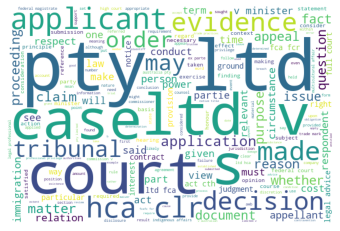

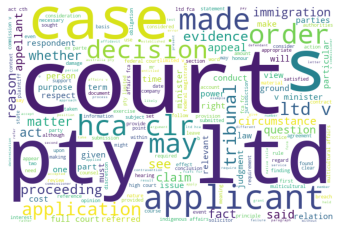

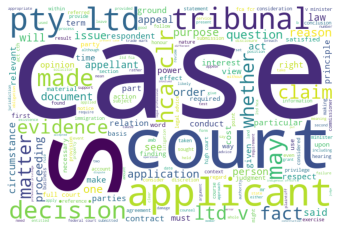

In [10]:
def visualize(label):
    text = ''
    for t in data[data['case_outcome'] == label]['clean_text']:
        t = str(t)
        t = t.lower()
        text += t + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off') #markup
    plt.show()

visualize('cited')
visualize('referred to')
visualize('applied') 
# proprietary limited company abbreviated as 'Pty Ltd'